In [30]:
import pandas as pd
import os
# Load the CSV file
csv_path = '/content/project_major.csv'
df = pd.read_csv(csv_path)

# Assign labels: first 474 images are healthy (label = '1'), remaining 291 are unhealthy (label = '0')
df['label'] = ['1'] * 474 + ['0'] * 291

# Replace backslashes with forward slashes in the image paths
df['image_path'] = df['image_path'].str.replace('\\', '/')

# Function to correct paths
def correct_path(image_path):
    base_dir = '/content/drive/MyDrive/both_images2'  # Adjust this based on your environment
    filename = os.path.basename(image_path)  # Extract the filename
    return os.path.join(base_dir, filename)  # Construct the new path

# Apply the function to the 'image_path' column
df['image_path'] = df['image_path'].apply(correct_path)

# Verify the changes
print(df.head())

# Save the updated CSV (optional)
df.to_csv('/content/project_corrected.csv', index=False)

# Check if the new paths are valid
invalid_paths = [path for path in df['image_path'] if not os.path.exists(path)]
print(f"Number of invalid paths: {len(invalid_paths)}")

# Display some invalid paths if there are any
for path in invalid_paths[:10]:
    print(path)

if len(invalid_paths) > 0:
    print("There are still invalid paths. Please check the directory and filenames.")
else:
    print("All paths are valid.")


                                          image_path label
0  /content/drive/MyDrive/both_images2/healthy (1...     1
1  /content/drive/MyDrive/both_images2/healthy (1...     1
2  /content/drive/MyDrive/both_images2/healthy (1...     1
3  /content/drive/MyDrive/both_images2/healthy (1...     1
4  /content/drive/MyDrive/both_images2/healthy(10...     1
Number of invalid paths: 9
/content/drive/MyDrive/both_images2/healthy(10).jpeg
/content/drive/MyDrive/both_images2/healthy.png
/content/drive/MyDrive/both_images2/healthy(101).jpg
/content/drive/MyDrive/both_images2/healthy.jpg
/content/drive/MyDrive/both_images2/healthy.jpg
/content/drive/MyDrive/both_images2/healthy(105).jpg
/content/drive/MyDrive/both_images2/healthy(107).jpg
/content/drive/MyDrive/both_images2/healthy(11).jpeg
/content/drive/MyDrive/both_images2/healthy(11).jpg
There are still invalid paths. Please check the directory and filenames.


In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure labels are strings
df['label'] = df['label'].astype(str)

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 603 validated image filenames belonging to 2 classes.
Found 152 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 9 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model built and compiled.")


Model built and compiled.


In [34]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
19/19 [==============================] - 37s 2s/step - loss: 0.5368 - accuracy: 0.6998 - val_loss: 0.3642 - val_accuracy: 0.8158
Epoch 2/10
19/19 [==============================] - 34s 2s/step - loss: 0.2649 - accuracy: 0.9138 - val_loss: 0.2114 - val_accuracy: 0.9145
Epoch 3/10
19/19 [==============================] - 34s 2s/step - loss: 0.1656 - accuracy: 0.9403 - val_loss: 0.1369 - val_accuracy: 0.9408
Epoch 4/10
19/19 [==============================] - 36s 2s/step - loss: 0.1396 - accuracy: 0.9486 - val_loss: 0.2019 - val_accuracy: 0.9145
Epoch 5/10
19/19 [==============================] - 34s 2s/step - loss: 0.1034 - accuracy: 0.9652 - val_loss: 0.1434 - val_accuracy: 0.9276
Epoch 6/10
19/19 [==============================] - 34s 2s/step - loss: 0.1271 - accuracy: 0.9569 - val_loss: 0.1485 - val_accuracy: 0.9342
Epoch 7/10
19/19 [==============================] - 34s 2s/step - loss: 0.1020 - accuracy: 0.9635 - val_loss: 0.1491 - val_accuracy: 0.9408
Epoch 8/10
19/19 [==

In [35]:
# Save the model
model.save('/content/scalp_psoriasis_model.h5')
print("Model trained and saved.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model trained and saved.


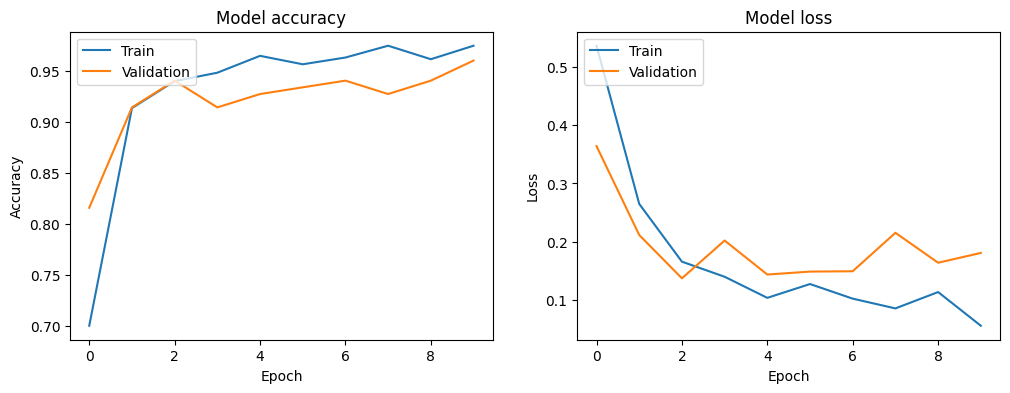

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the validation set
val_predictions = model.predict(val_generator)
val_predictions = np.where(val_predictions > 0.5, 1, 0)  # Convert probabilities to class labels

# Get true labels
val_true_labels = val_generator.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


5/5 [==============================] - 3s 527ms/step
Confusion Matrix:
[[21 37]
 [41 53]]


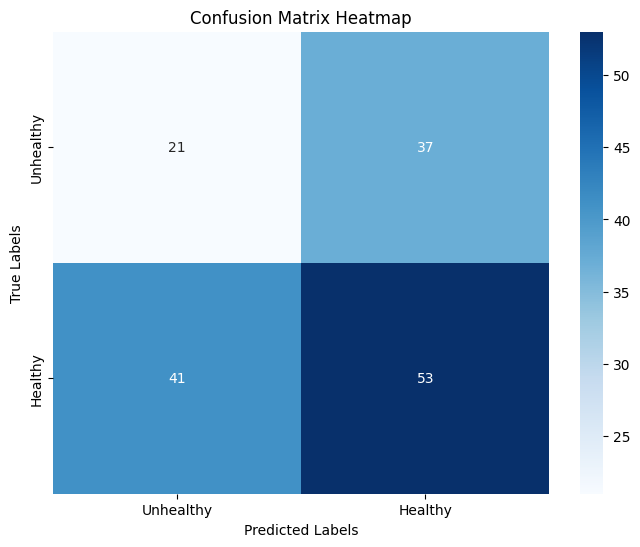

In [38]:
# Plot the heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [39]:
#prediction of model with user input
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    print("your scalp is",end=" ")
    if prediction < 0.5:
        print("Unhealthy")
    else:
        print("Healthy")

# Example usage
classify_image('/content/healthy (10).jpg', model)


1/1 [==============================] - 0s 103ms/step
your scalp is Healthy


In [41]:
#prediction of model with user input
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    print("your scalp is",end=" ")
    if prediction < 0.5:
        print("Unhealthy")
    else:
        print("Healthy")

# Example usage
classify_image('/content/unhealthy (32).jpg', model)


1/1 [==============================] - 0s 40ms/step
your scalp is Unhealthy


1/1 [==============================] - 0s 121ms/step


<ipython-input-58-0ad140da65f3>:38: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  heatmap = Image.fromarray(heatmap).resize(original_size, Image.ANTIALIAS)


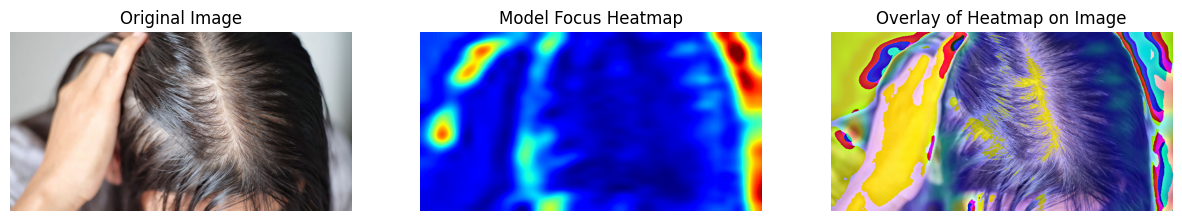

Your scalp is Healthy


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from PIL import Image
import cv2

def apply_model_and_display(img_path, model):
    # Load the original image
    original_img = Image.open(img_path).convert('RGB')
    original_size = original_img.size

    # Preprocess the image for the model
    target_size = (128, 128)
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)

    # Use the last convolutional layer (conv2d_8) for visualization
    layer_name = 'conv2d_8'  # Update this to the correct layer name
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(img_array)

    # Process the intermediate output
    # Compute the mean of the feature maps to get a heatmap
    heatmap = np.mean(intermediate_output[0], axis=-1)

    # Normalize the heatmap
    heatmap -= heatmap.min()
    heatmap /= heatmap.max()

    # Resize heatmap to original image size
    heatmap = np.uint8(255 * heatmap)
    heatmap = Image.fromarray(heatmap).resize(original_size, Image.ANTIALIAS)
    heatmap = np.array(heatmap)

    # Apply colormap to heatmap
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    # Superimpose the heatmap on original image
    superimposed_img = heatmap_colored * 0.4 + np.array(original_img)

    # Display the original and processed images
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title('Model Focus Heatmap')
    plt.axis('off')

    # Superimposed image
    plt.subplot(1, 3, 3)
    plt.imshow(np.uint8(superimposed_img))
    plt.title('Overlay of Heatmap on Image')
    plt.axis('off')

    plt.show()

    # Print the prediction result
    print("Your scalp is", end=" ")
    if prediction < 0.5:
        print("Unhealthy")
    else:
        print("Healthy")

# Example usage with your specific image
apply_model_and_display('/content/healthy (36).jpg', model)


1/1 [==============================] - 0s 73ms/step


<ipython-input-23-62a830a24139>:39: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  heatmap = Image.fromarray(heatmap).resize(original_size, Image.ANTIALIAS)


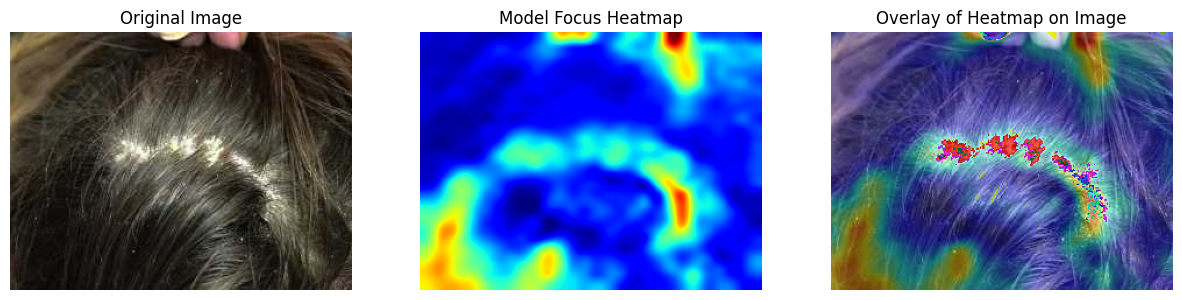

scalp is Unhealthy


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from PIL import Image

def apply_model_and_display(img_path, model):
    # Load the original image
    original_img = Image.open(img_path).convert('RGB')
    original_size = original_img.size

    # Preprocess the image for the model
    target_size = (128, 128)
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)

    # Extract intermediate layer outputs to visualize model focus
    # Let's focus on the last convolutional layer
    # Adjust 'conv2d_3' to the actual name of your last Conv2D layer
    layer_name = 'conv2d_2'  # Replace with your layer's actual name
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(img_array)

    # Process the intermediate output
    # Compute the mean of the feature maps to get a heatmap
    heatmap = np.mean(intermediate_output[0], axis=-1)

    # Normalize the heatmap
    heatmap -= heatmap.min()
    heatmap /= heatmap.max()

    # Resize heatmap to original image size
    heatmap = np.uint8(255 * heatmap)
    heatmap = Image.fromarray(heatmap).resize(original_size, Image.ANTIALIAS)
    heatmap = np.array(heatmap)

    # Apply colormap to heatmap
    import cv2
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    # Superimpose the heatmap on original image
    superimposed_img = heatmap_colored * 0.4 + np.array(original_img)

    # Display the original and processed images
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title('Model Focus Heatmap')
    plt.axis('off')

    # Superimposed image
    plt.subplot(1, 3, 3)
    plt.imshow(np.uint8(superimposed_img))
    plt.title('Overlay of Heatmap on Image')
    plt.axis('off')

    plt.show()

    # Print the prediction result
    print("scalp is", end=" ")
    if prediction < 0.5:
        print("Unhealthy")
    else:
        print("Healthy")

# Example usage with your specific image
apply_model_and_display('/content/unhealthy (32).jpg', model)


1/1 [==============================] - 0s 78ms/step


<ipython-input-59-6d5ca5a6244a>:38: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  heatmap = Image.fromarray(heatmap).resize(original_size, Image.ANTIALIAS)


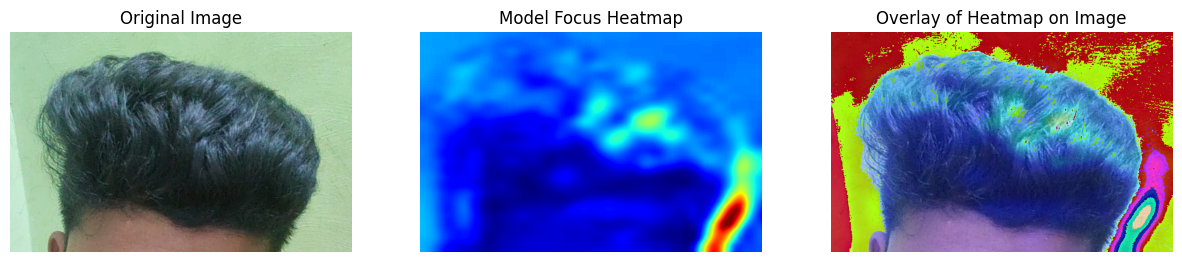

Your scalp is Healthy


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from PIL import Image
import cv2

def apply_model_and_display(img_path, model):
    # Load the original image
    original_img = Image.open(img_path).convert('RGB')
    original_size = original_img.size

    # Preprocess the image for the model
    target_size = (128, 128)
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)

    # Use the last convolutional layer (conv2d_8) for visualization
    layer_name = 'conv2d_8'  # Update this to the correct layer name
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(img_array)

    # Process the intermediate output
    # Compute the mean of the feature maps to get a heatmap
    heatmap = np.mean(intermediate_output[0], axis=-1)

    # Normalize the heatmap
    heatmap -= heatmap.min()
    heatmap /= heatmap.max()

    # Resize heatmap to original image size
    heatmap = np.uint8(255 * heatmap)
    heatmap = Image.fromarray(heatmap).resize(original_size, Image.ANTIALIAS)
    heatmap = np.array(heatmap)

    # Apply colormap to heatmap
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

    # Superimpose the heatmap on original image
    superimposed_img = heatmap_colored * 0.4 + np.array(original_img)

    # Display the original and processed images
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    # Heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title('Model Focus Heatmap')
    plt.axis('off')

    # Superimposed image
    plt.subplot(1, 3, 3)
    plt.imshow(np.uint8(superimposed_img))
    plt.title('Overlay of Heatmap on Image')
    plt.axis('off')

    plt.show()

    # Print the prediction result
    print("Your scalp is", end=" ")
    if prediction < 0.5:
        print("Unhealthy")
    else:
        print("Healthy")

# Example usage with your specific image
apply_model_and_display('/content/sample2.jpg', model)


In [60]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
val_loss,test_acc=model.evaluate(train_generator)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

print(f"test accruacy: {test_acc * 100:.2f}%")


19/19 [==============================] - 14s 713ms/step - loss: 0.0346 - accuracy: 0.9900
Validation Accuracy: 96.05%
test accruacy: 99.00%
